In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [25]:
r = 0.00 # 이자율 
sig = 0.2 # 주식 시장은 주식의 변동성 0.2 기준
T = 30/365 # 만기 시각 

M = 100 # 100개의 시나리오 
N = 30 # 한 달을 30개로 나누어서 보겠다

dt = T/N # 만기까지 남은 시간을 나누어서 보기
rdt = r * dt
sigsdt = sig * np.sqrt(dt)

In [26]:
S0 = 100 # 현재 자산의 가격 
np.random.seed(100)
S = np.empty((M, N+1)) # M by N+1 matrix 
rv = np.random.normal(r * dt, sigsdt, [M,N]) 
# mean = r * dt, standrad deviation = sigsdt, M by N matrix 


In [27]:
for i in range(M):
    S[i, 0] = S0
    for j in range(N):
        S[i, j + 1] = S[i, j] *(1 + rv[i,j])

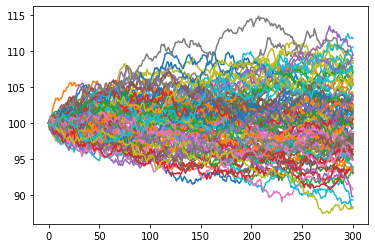

In [19]:
for i in range(M):
    plt.plot(S[i,:])

plt.show()

In [20]:
m = 0
for j in range(N):
    print(S[m, j])

100.0
99.42075351633073
99.53353813699196
99.91346132284623
99.82996662051177
100.15427299696499
100.32476382960353
100.39822145983034
100.04258117671371
99.97982331887157
100.06422256522129
99.91249885476493
100.0564303488724
99.86312664835792
100.13316750643415
100.3561631493222
100.32147553242952
100.14503382578143
100.48641335809323
100.34066640857009
99.96919451867956
100.50498091860524
101.01789462922783
100.93366321804244
100.6521774891184
100.71365936391483
101.02608713355079
101.27056225875447
101.72702184565546
101.61715807041904
101.63588724984811
101.71071534067532
101.22477617170428
100.97132487140115
101.24423103552347
101.49575106774782
101.34255566999289
101.74165821810027
101.17224497675838
100.71795576141473
100.30703856347445
100.12625275795922
99.90478034991871
99.90719947448163
99.70447909207185
100.13347921349025
99.558985348333
99.23490363593679
99.35234835149011
98.82164503758995
99.30277658006959
98.91223450550514
98.73222484723743
98.42497500579431
98.15521116

In [21]:
m = 99 
K = 100 # 옵션의 행사 가격 

hedge = 0 # hedge를 하기 위해 보유해야 하는 주식의 개수 
cost = 0 

for j in range(N):
    d1 = (np.log(S[m, j]/K) + (r+0.5*(sig)**2)*(T - j * dt))/(sig*np.sqrt(T - j * dt)) # 시간 단위만큼 T를 줄임 
    delta = norm.cdf(d1) # 표준 정규분포 N(d1)임 
    cost = cost + (hedge - delta) * S[m, j] # 음수인 경우 지불해야하는 비용 

    print(S[m, j], delta, delta - hedge, cost)

    hedge = delta 

100.0 0.5114357531402248 0.5114357531402248 -51.143575314022485
99.86526895623275 0.5020220532848599 -0.009413699855364888 -50.20347364609322
99.78273934900386 0.49621569682838484 -0.0058063564564750925 -49.624099493229366
99.98804967701562 0.5105430552058472 0.014327358377462351 -51.056664114415476
99.57124024854369 0.48127041267902904 -0.02927264252681816 -48.14195079266793
99.25378196845044 0.4588606829387951 -0.02240972974023392 -45.91770036305885
99.49385414108949 0.4756734736952919 0.016812790756496776 -47.5904697142904
99.60986791544204 0.4837872785873434 0.00811380489205149 -48.398684747879315
100.30463870475492 0.5326986833143236 0.04891140472698019 -53.304725527561104
100.25218794652288 0.5290321131567716 -0.003666570157552007 -52.937143847007086
100.22468223692384 0.5271063241522838 -0.00192578900448781 -52.744132255976936
100.6403166350843 0.556284213057844 0.02917788890556028 -55.68060423417584
100.57744246928459 0.5519458440733729 -0.004338368984471153 -55.244262177229665

In [22]:
M = 70
K = 100

hedge = 0
cost = 0
for j in range(N):
    d1 = (np.log(S[M,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
    delta = norm.cdf(d1)
    cost = cost + (hedge-delta) * S[M,j]
    hedge = delta
    print(S[M,j], delta, cost)

if S[M,N] > K:
    delta = 1
    cost = cost + K # 가격을 받고 팔아버리는 것 
else:
    delta = 0
    cost = cost + S[M,N] * hedge # 주식을 단순히 청산하고 마무리 
   
print(S[M,N], 0, cost)

100.0 0.5114357531402248 -51.143575314022485
99.77801407370154 0.49593018763513247 -49.596460780834676
99.24417961990743 0.45850988890199257 -45.882713931932344
98.6847811490716 0.419356998791322 -42.01891954000717
98.91847853650951 0.4354763126358822 -43.61341754056356
99.09749806308794 0.44787997457477424 -44.84258940552811
100.00665727237285 0.5117885330002541 -51.233870704756484
100.3827467075717 0.5381399846707473 -53.879101803172425
100.34264639964141 0.5353607484395355 -53.60022588476287
100.22806995385481 0.5273366294956396 -52.79598392993602
100.49693682724661 0.5462205638082751 -54.69376148360282
100.37728440724956 0.5378635622540374 -53.85490836180128
100.90787981043391 0.5749392422263365 -57.59613662033615
100.9230379140921 0.5760791245144821 -57.71117700372026
101.04359089791728 0.5845057125121554 -58.56262971402247
100.97523371752516 0.5798855524959999 -58.09610797657881
100.25082255485931 0.5290164019088045 -52.99643378754546
100.18550984726026 0.524370291977339 -52.5309

In [28]:
M = 67
a = []
# n 개수 변화 
K = 100

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)  
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta

    if S[i,N] > K:
        cost = cost + (hedge-1)*S[i,N] + K
        #print(hedge)
    else:
        cost = cost + (hedge-0)*S[i,N]
        #print(hedge)
        

    a.append(cost)

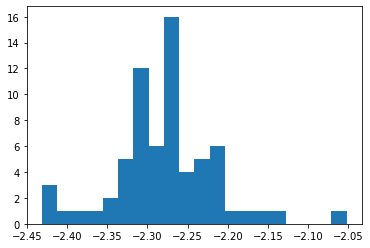

In [29]:
plt.hist(a, bins=20)
plt.show()